In [ ]:
%pip install music21

In [1]:
import os
from music21 import converter, pitch, interval, instrument, note, stream, meter
from matplotlib import pyplot as plt

from xen.data import SequenceDataSet
from xen.visualise import plotPart, plotMeasures

data_dir = "../data/mutopia_guitar/"
data_file = "CarcassiMethodPreludes.mid"

dataset = SequenceDataSet()
dataset.loadMidiFiles([data_dir + data_file])

print(f'Loaded {len(dataset.songs)} Songs') 

Loaded 1 Songs


Length: 606.0
S:


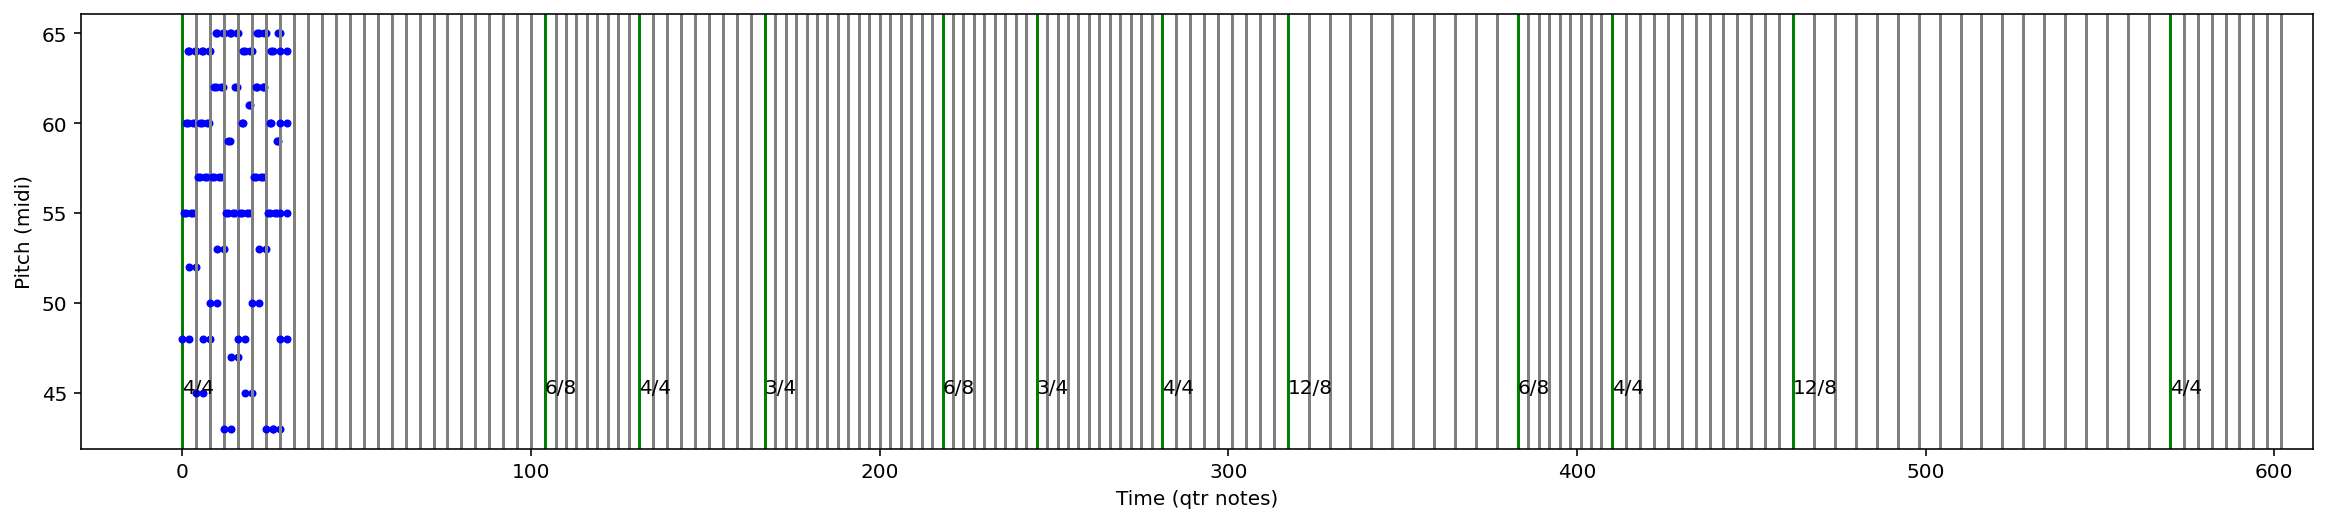

Length: 606.0
S:


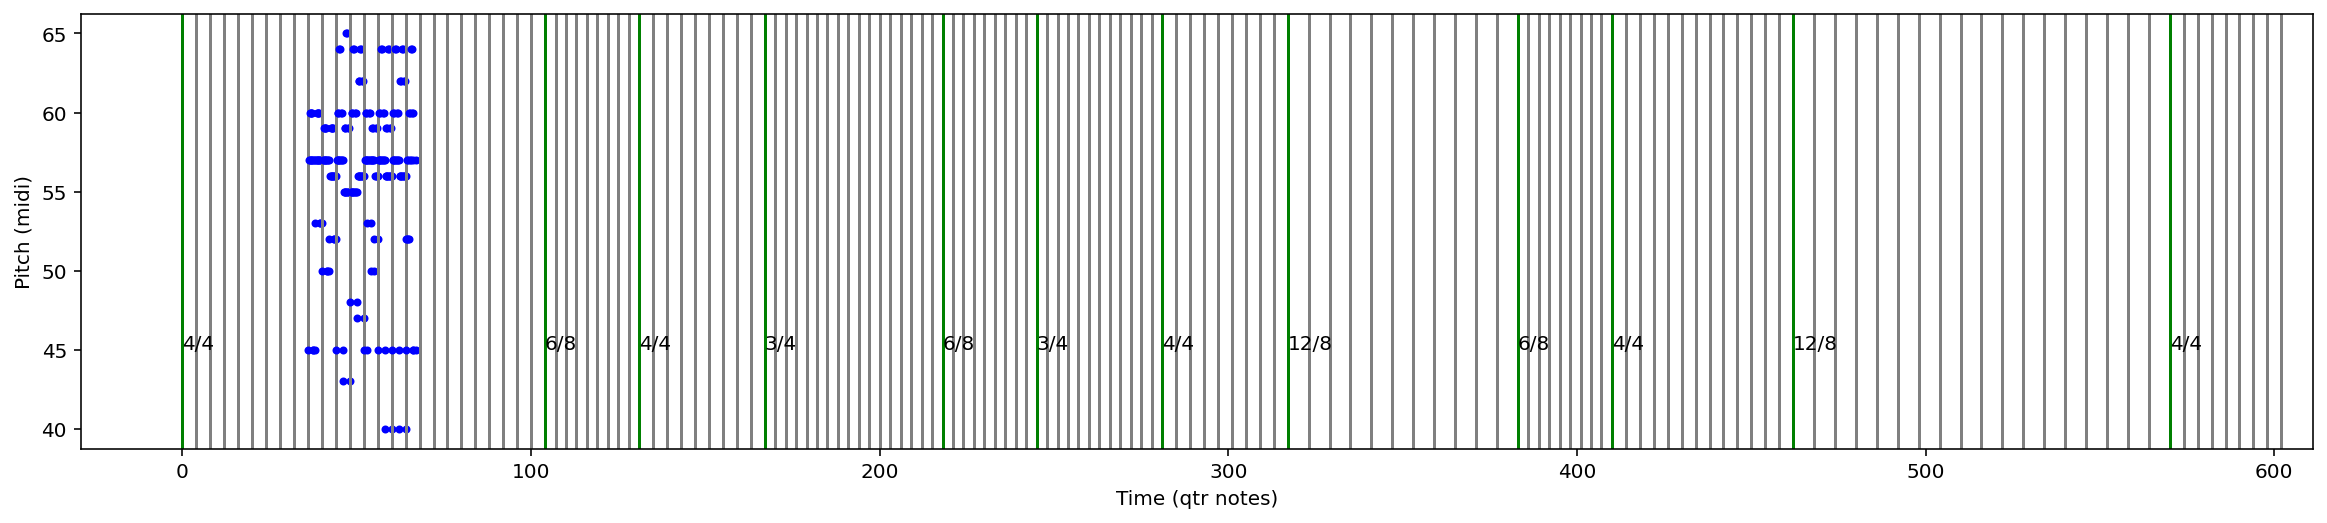

Length: 606.0
S:


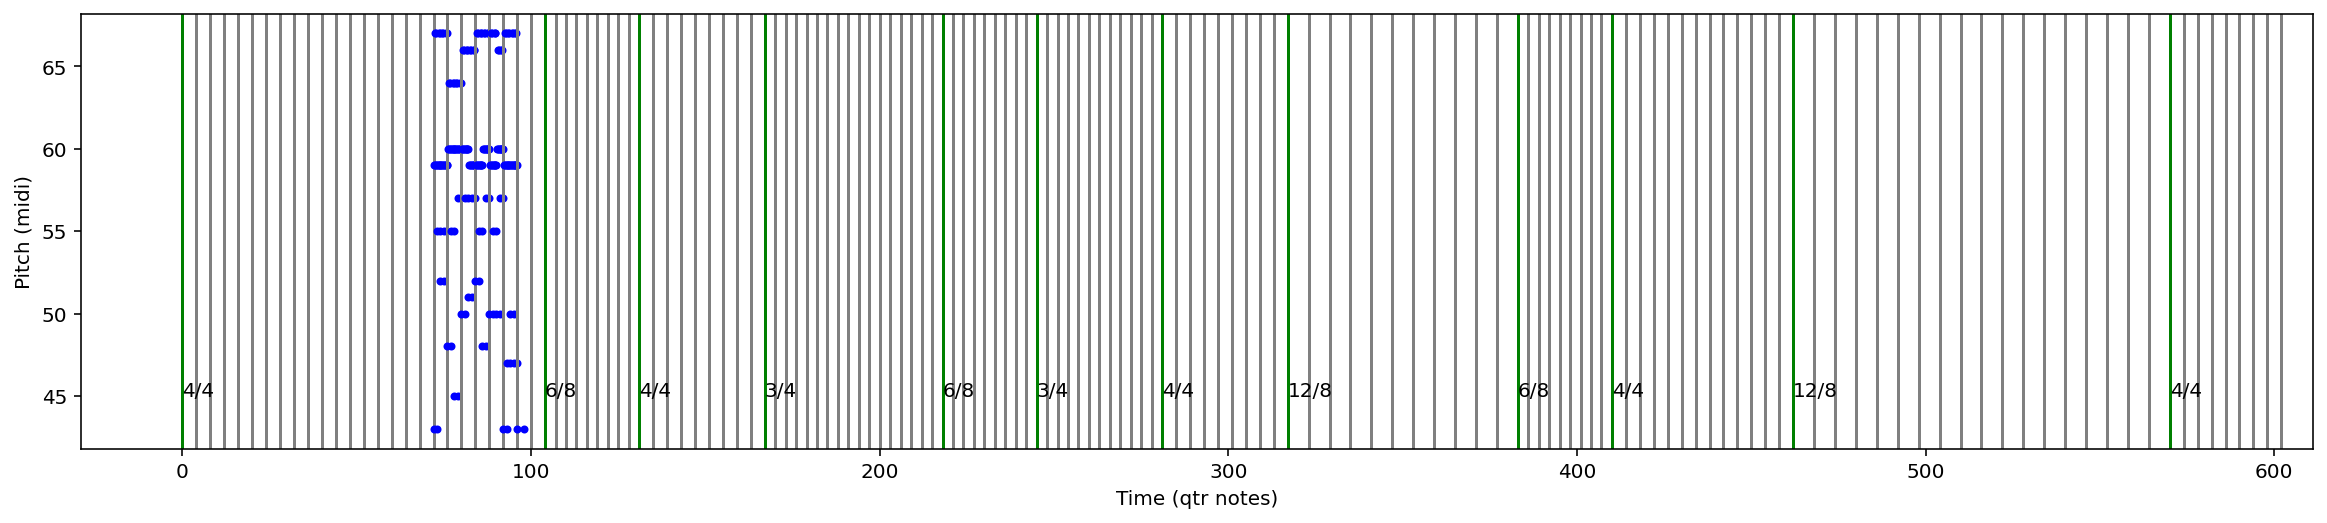

Length: 606.0
S:


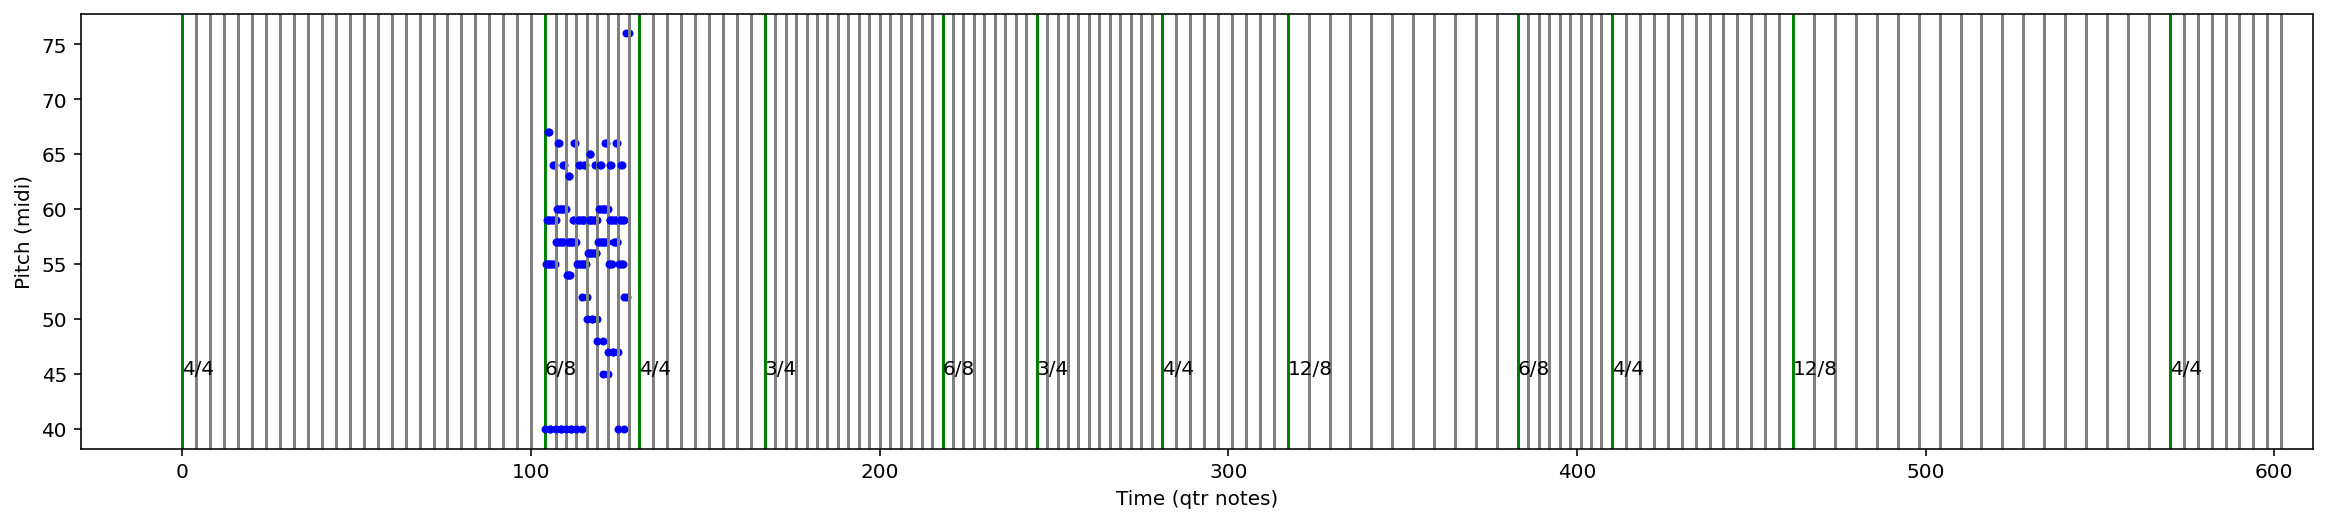

Length: 606.0
S:


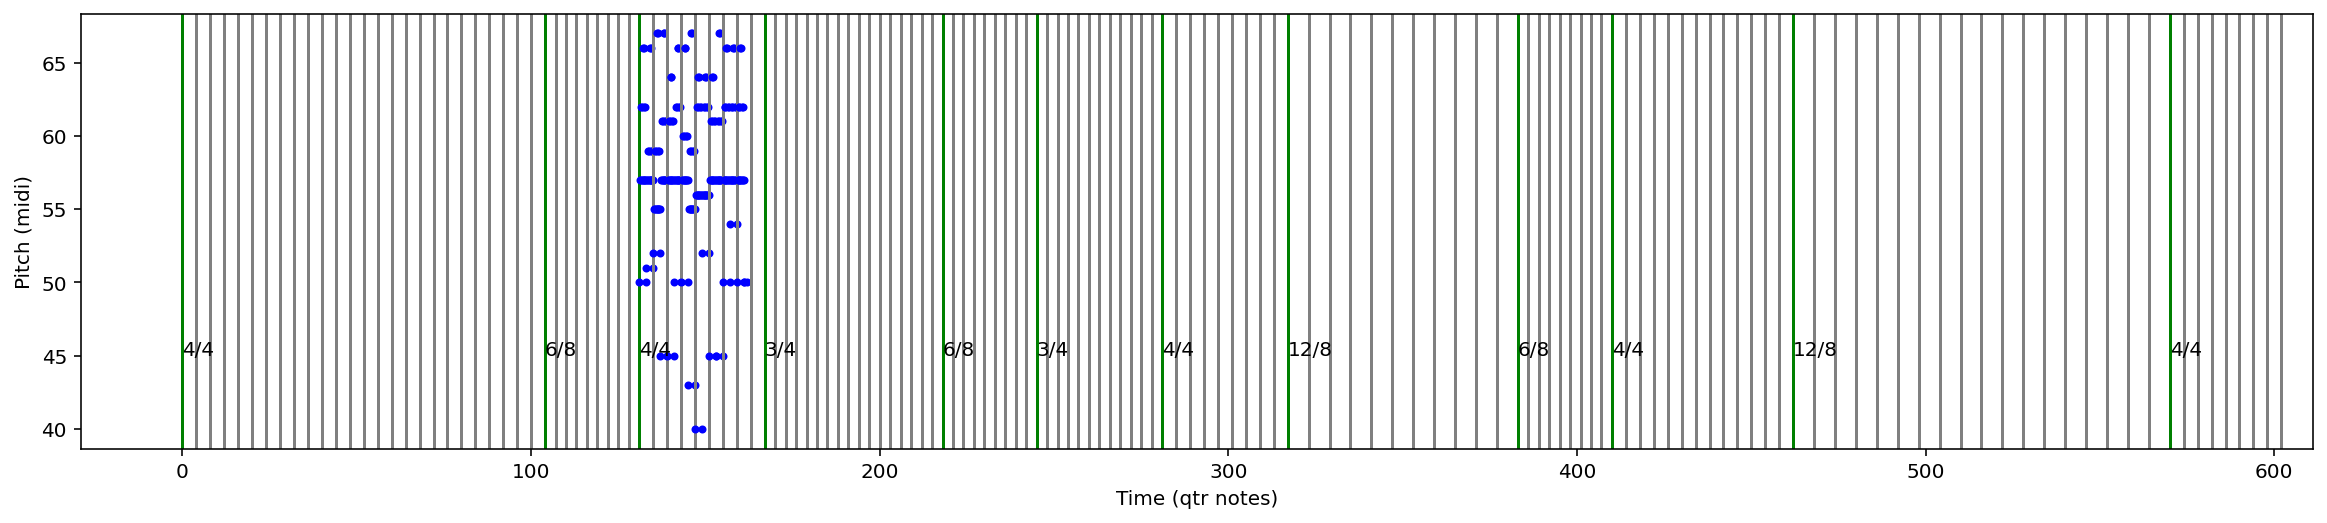

Length: 606.0
S:


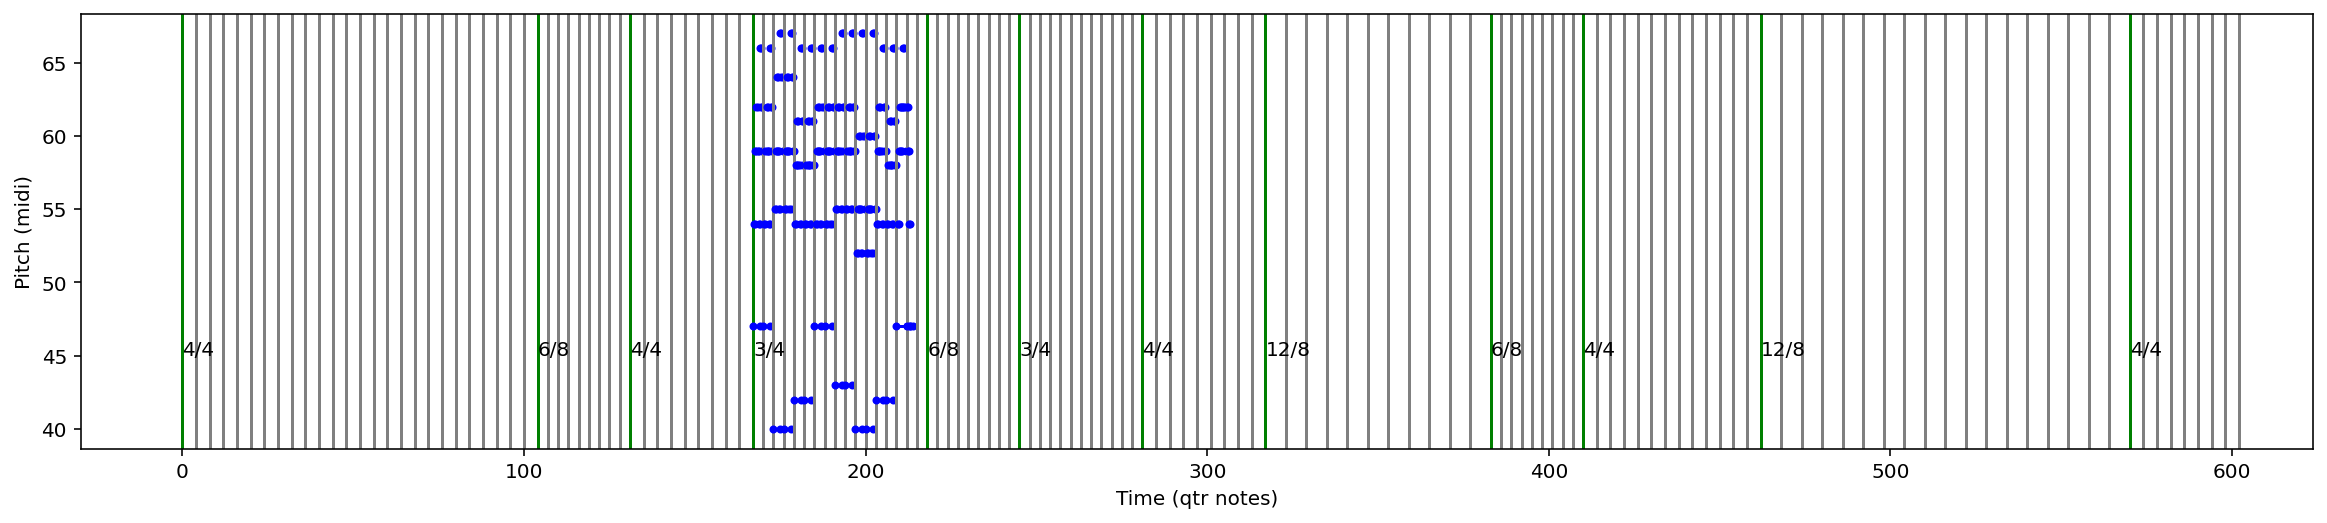

Length: 606.0
S:


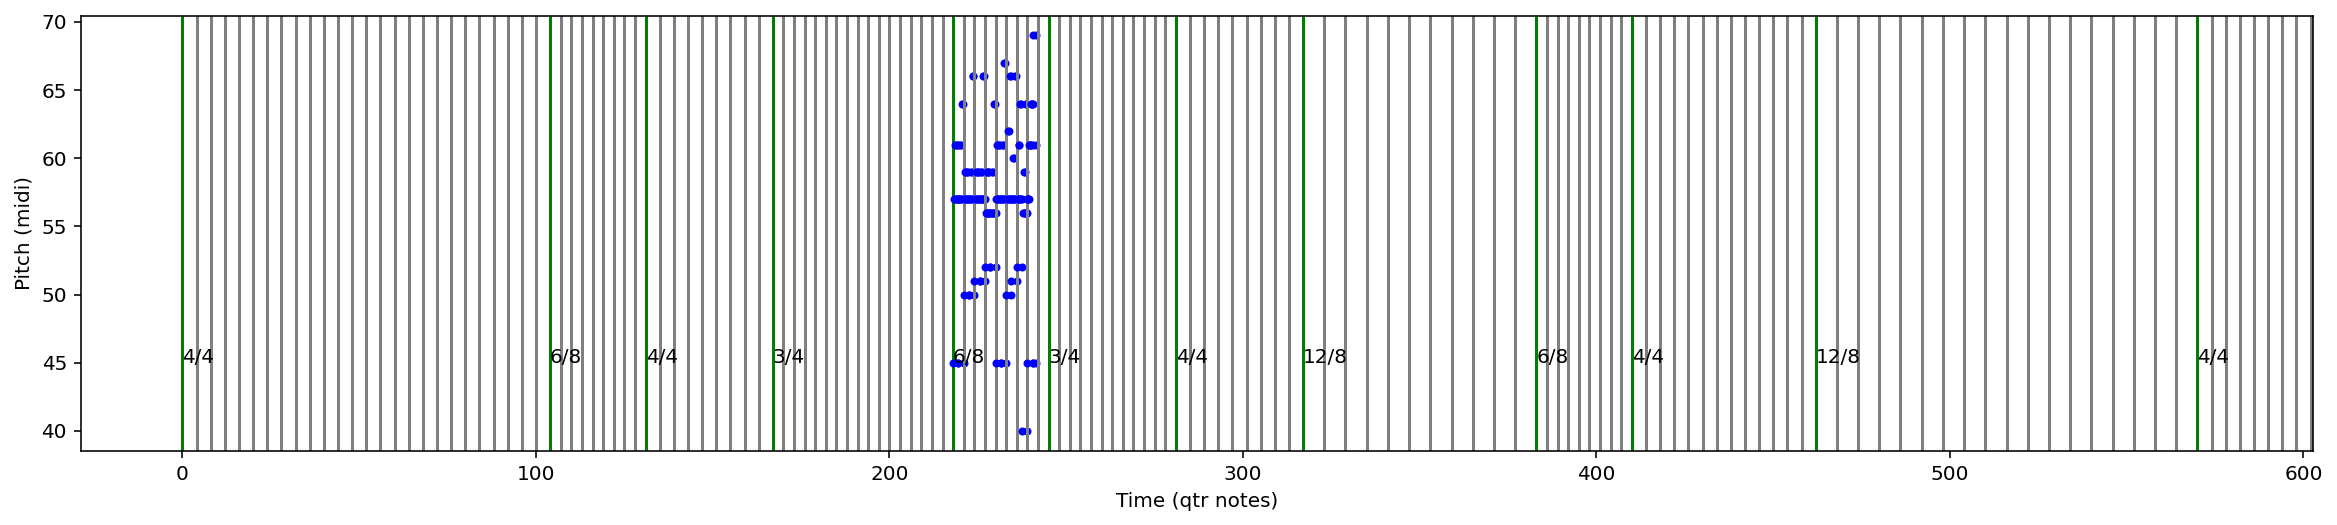

Length: 606.0
S:


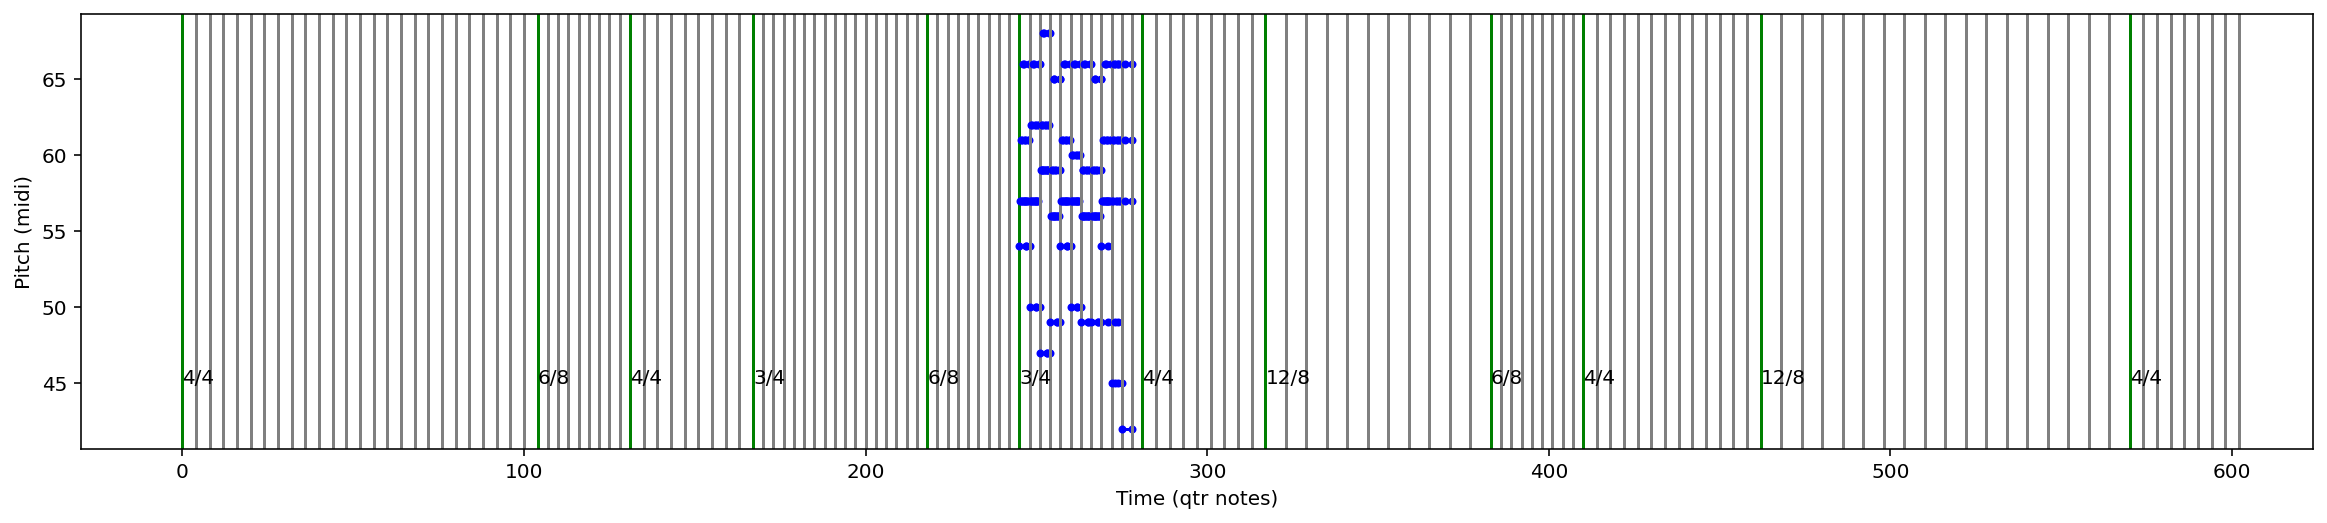

Length: 606.0
S:


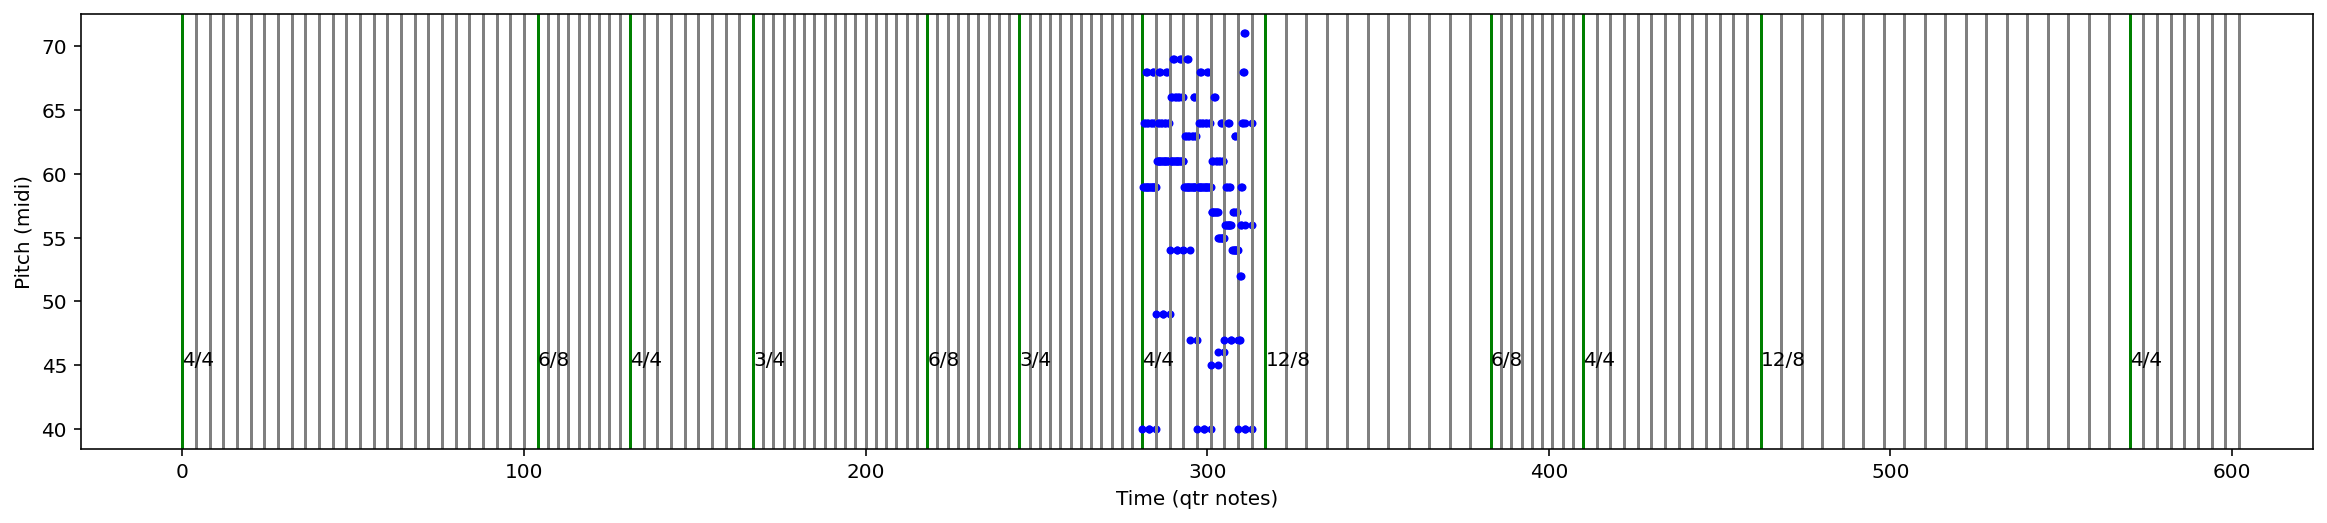

Length: 606.0
S:


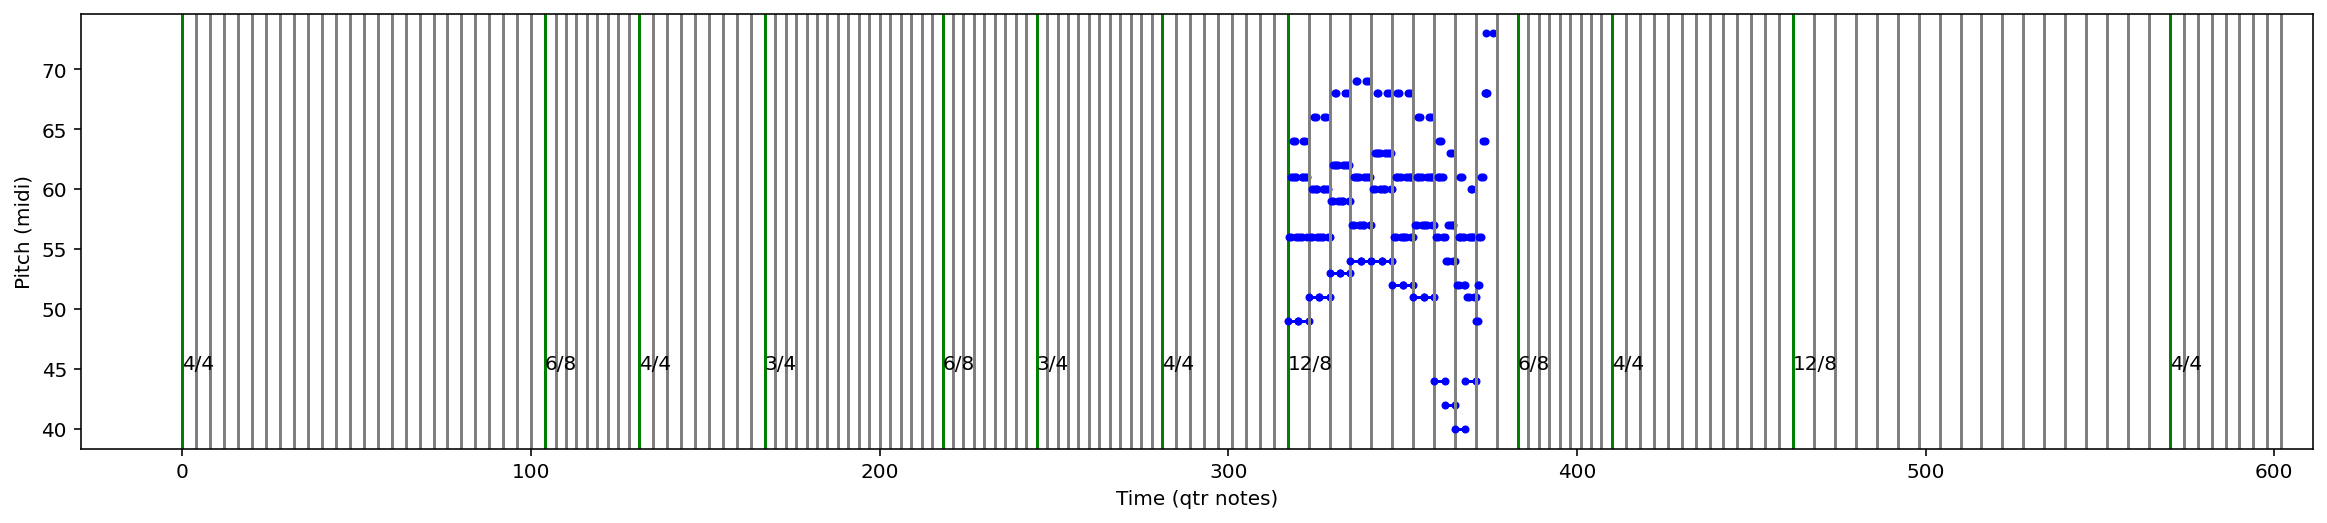

Length: 606.0
S:


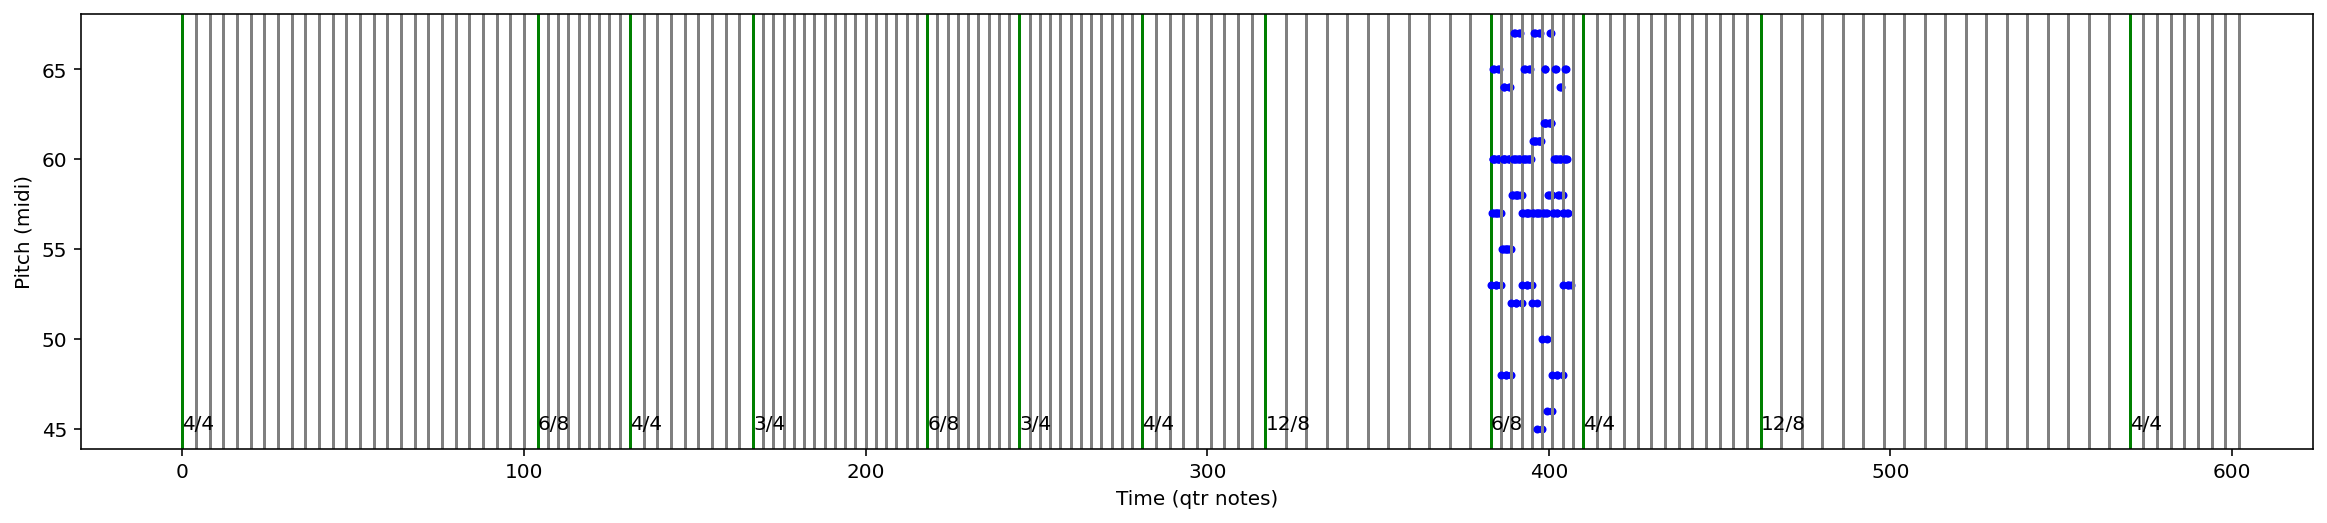

Length: 606.0
S:


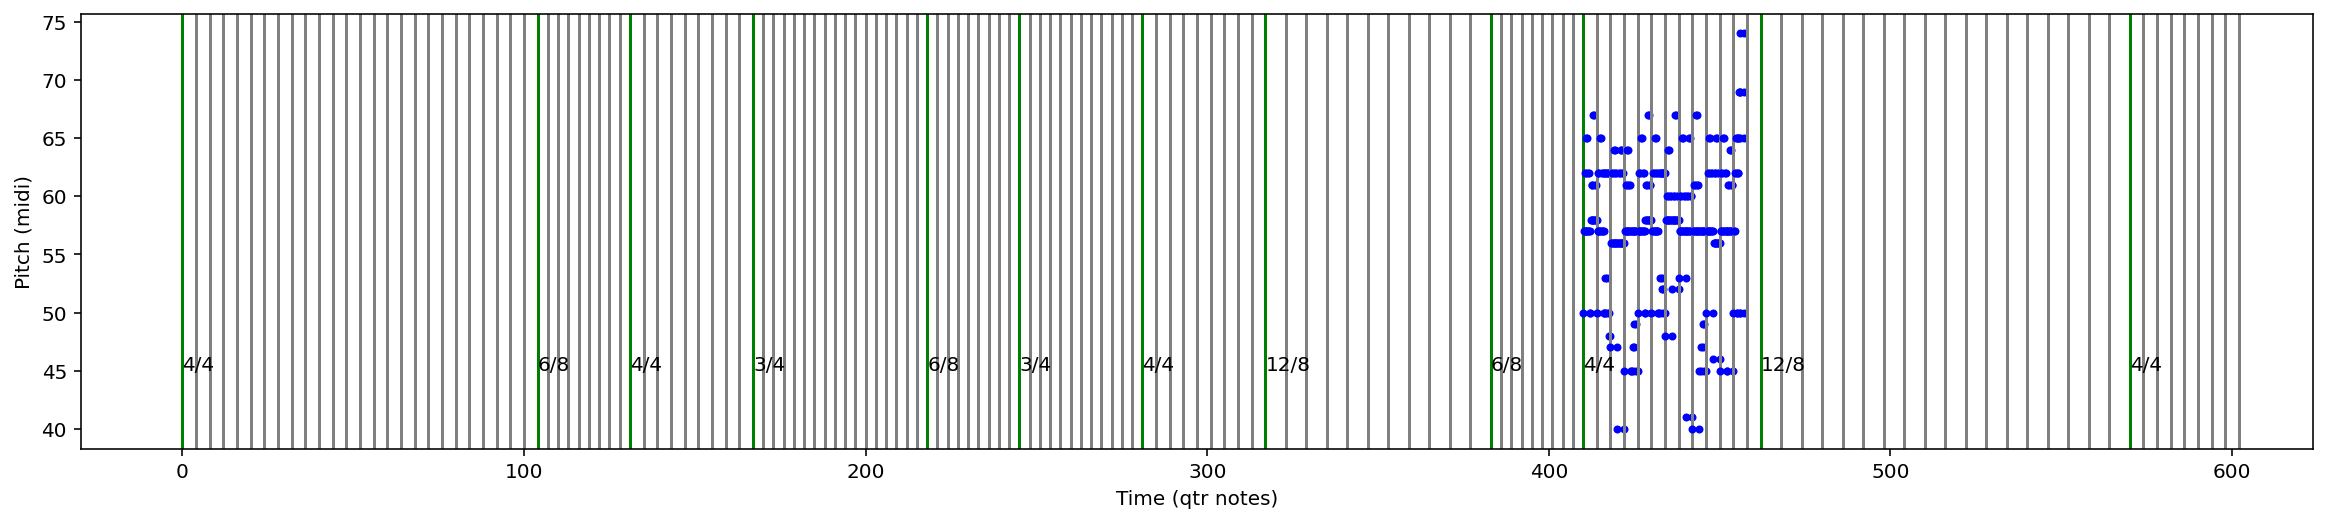

Length: 606.0
S:


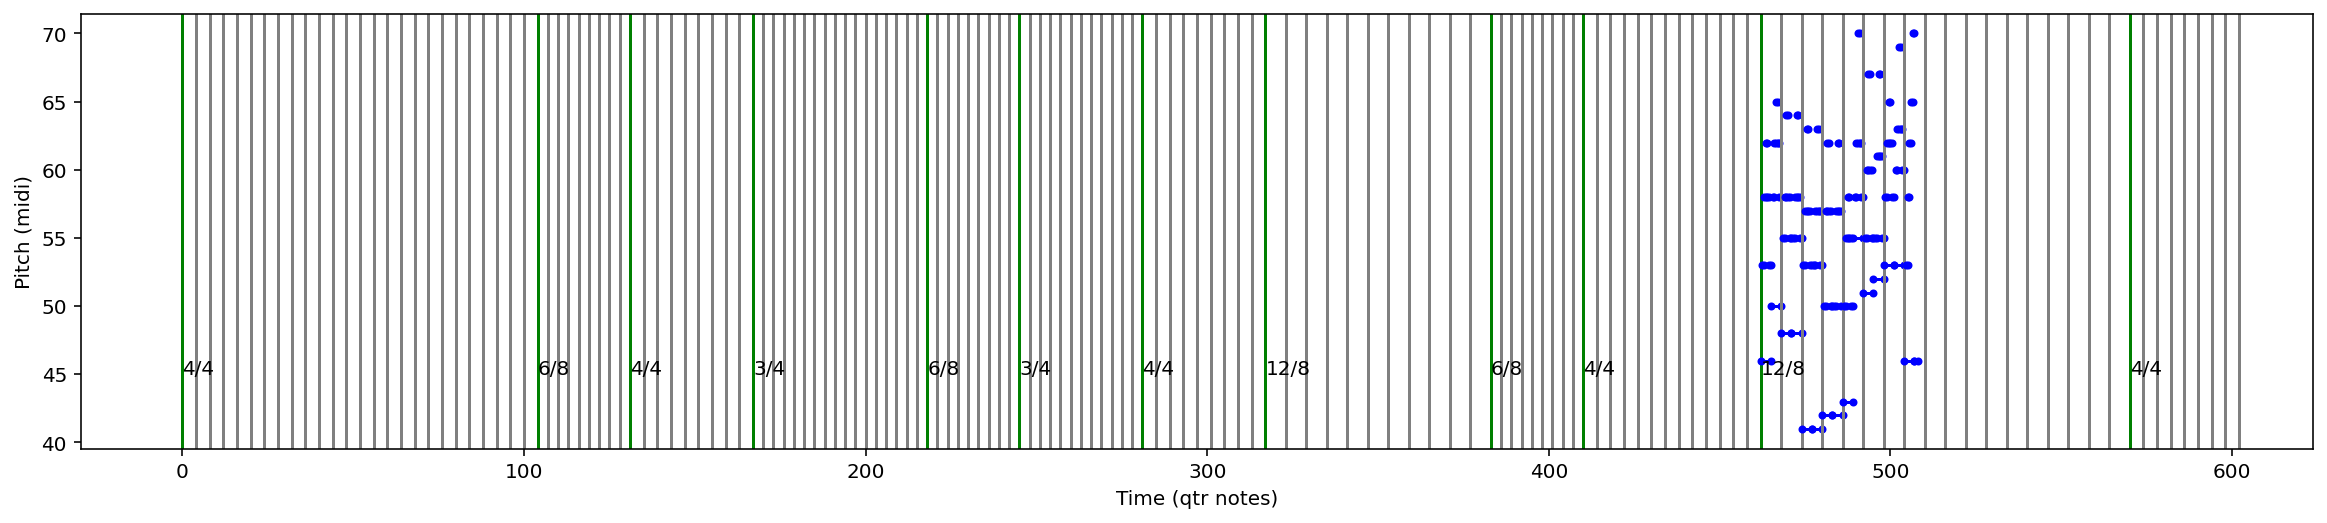

Length: 606.0
S:


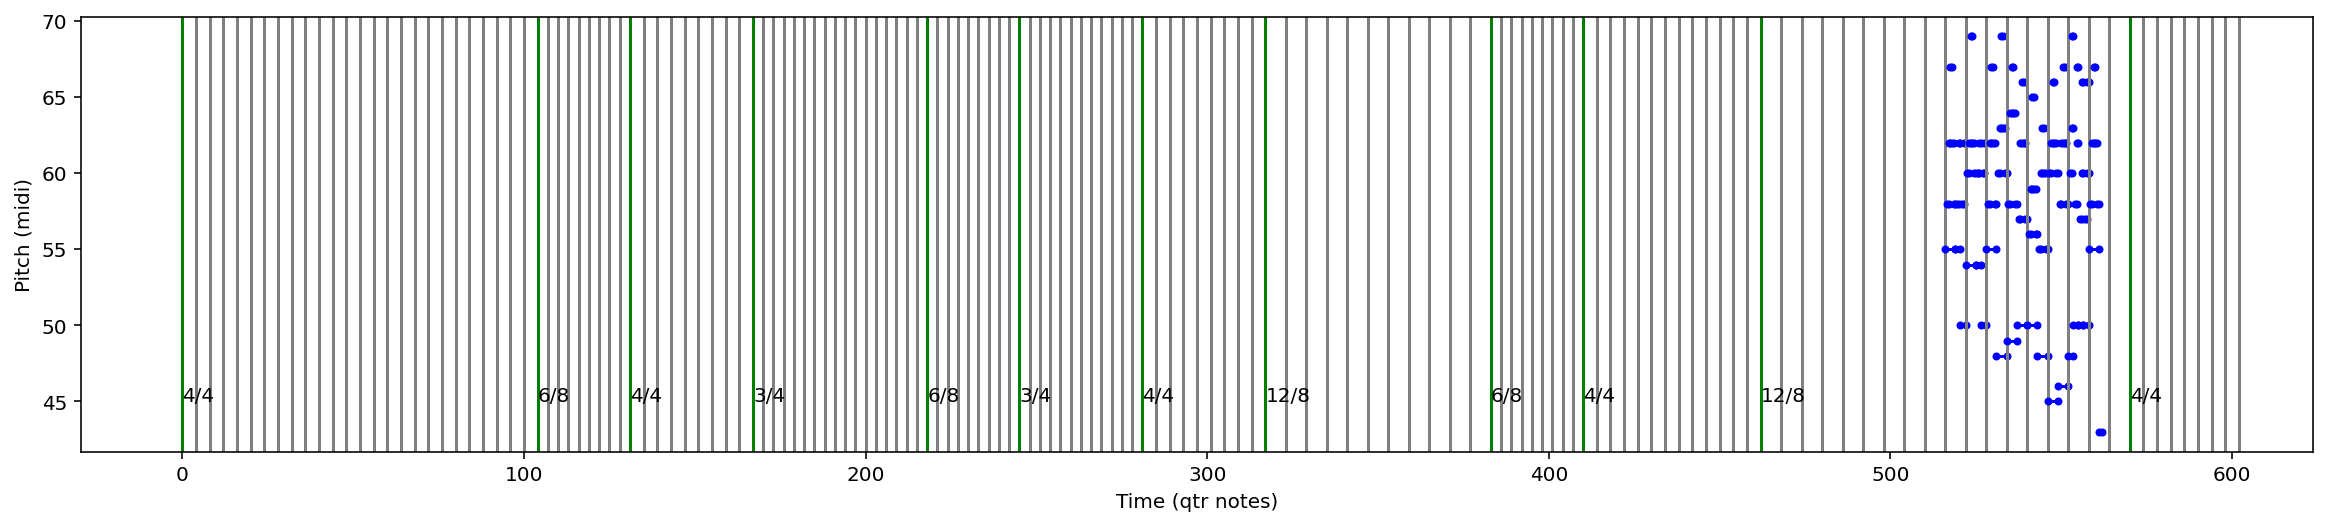

Length: 606.0
S:


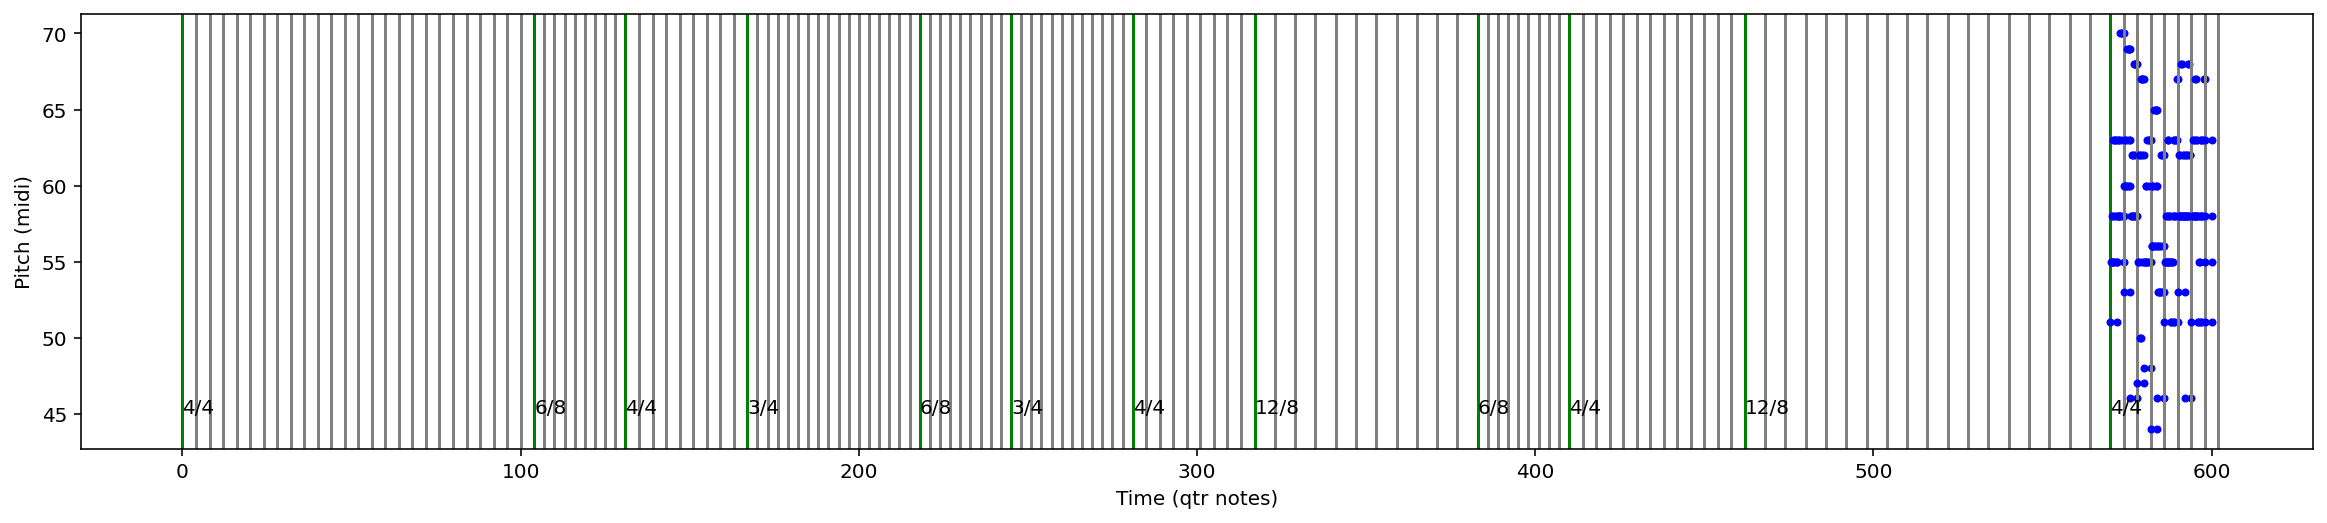

Length: 636.0
S:


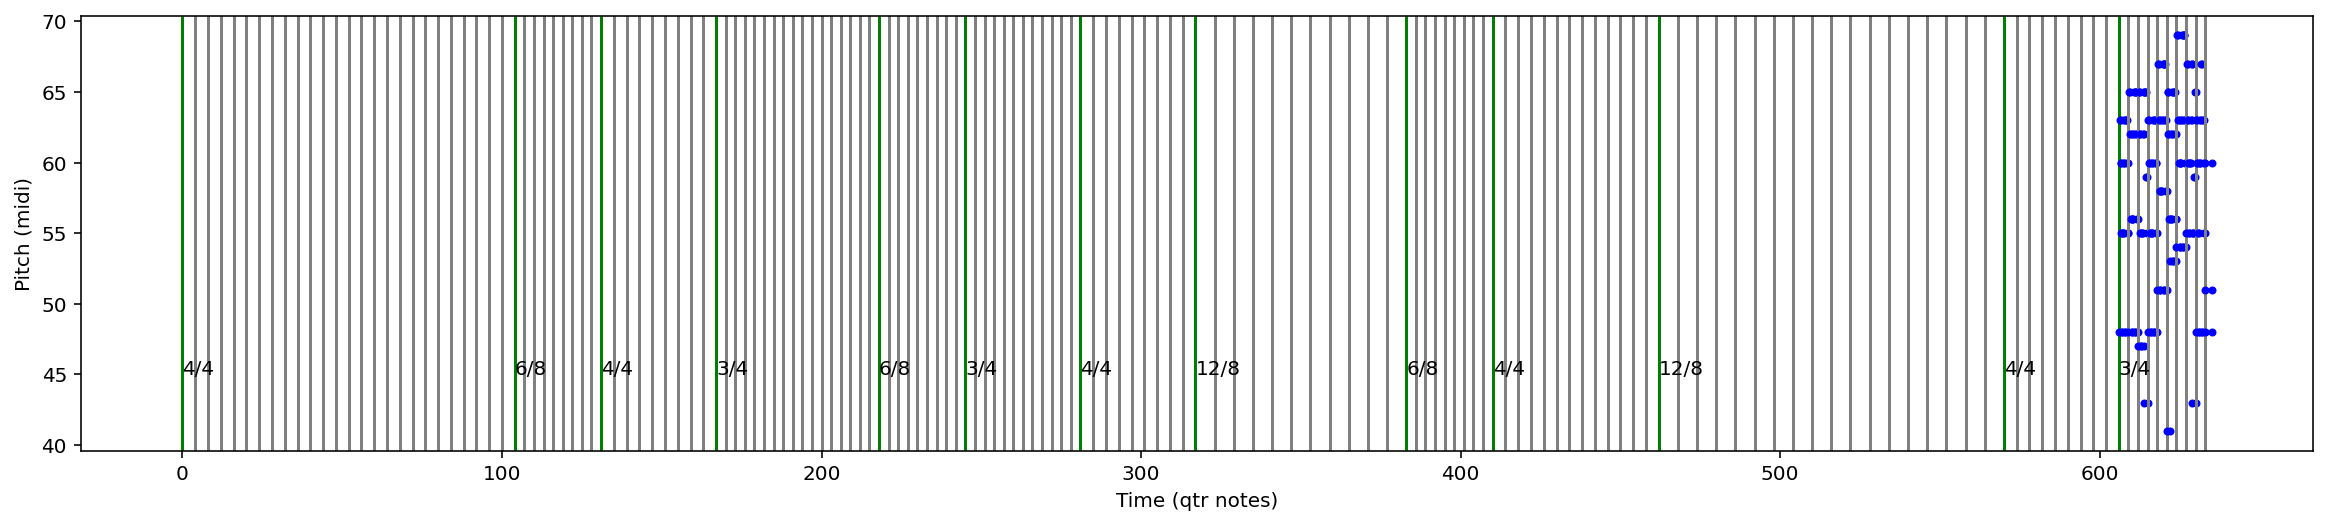

In [3]:
for i, song in enumerate(dataset.songs):
    for part in song.score.getElementsByClass(stream.Part):
        # part = part.chordify()
        print(f'Length: {part.duration.quarterLength}')
        plotPart(part)

# scores[0].show()

In [ ]:
for i, score in enumerate(dataset.songs):
    for part in song.score.getElementsByClass(stream.Part):
        measures = part.getElementsByClass(stream.Measure)
        plotMeasures(measures[0:4])
        

In [2]:
for i, song in enumerate(dataset.songs):
    for part in song.getParts():
        measuresList = song.getConsecutiveMeasures(part, 4, '4/4')
        print(measuresList)


[[<music21.stream.Measure 1 offset=0.0>, <music21.stream.Measure 2 offset=4.0>, <music21.stream.Measure 3 offset=8.0>, <music21.stream.Measure 4 offset=12.0>], [<music21.stream.Measure 5 offset=16.0>, <music21.stream.Measure 6 offset=20.0>, <music21.stream.Measure 7 offset=24.0>, <music21.stream.Measure 8 offset=28.0>]]
[[<music21.stream.Measure 10 offset=36.0>, <music21.stream.Measure 11 offset=40.0>, <music21.stream.Measure 12 offset=44.0>, <music21.stream.Measure 13 offset=48.0>], [<music21.stream.Measure 14 offset=52.0>, <music21.stream.Measure 15 offset=56.0>, <music21.stream.Measure 16 offset=60.0>, <music21.stream.Measure 17 offset=64.0>]]
[[<music21.stream.Measure 19 offset=72.0>, <music21.stream.Measure 20 offset=76.0>, <music21.stream.Measure 21 offset=80.0>, <music21.stream.Measure 22 offset=84.0>]]
[]
[[<music21.stream.Measure 36 offset=131.0>, <music21.stream.Measure 37 offset=135.0>, <music21.stream.Measure 38 offset=139.0>, <music21.stream.Measure 39 offset=143.0>], [<mu

In [1]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

ticksPerQuarter = 4
measureLength = ticksPerQuarter * 4 # 4 quarter notes per measure (time sig numerator)
measuresPerSequence = 4
sequenceLength = measureLength*measuresPerSequence
midiNotes = 128
sequences = np.empty((0, sequenceLength, midiNotes), int)

minPitch = 127
maxPitch = 0
for i, score in enumerate(scores):
    for part in score.getElementsByClass(stream.Part):
        seqs, seqMin, seqMax = getPartSequences(part, ticksPerQuarter, measuresPerSequence)
        sequences = np.append(sequences, seqs, 0)
        minPitch = min(minPitch, seqMin)
        maxPitch = max(maxPitch, seqMax)


trainInput = np.array(sequences)
print(trainInput.shape)
trainInput = trainInput[0:, 0:, minPitch:maxPitch+1]  # remove unused pitch classes

numSequences = trainInput.shape[0]
sequenceLength = trainInput.shape[1]
numCategories = trainInput.shape[2] #Category per midi note

print(trainInput.shape) # sequences, sequence length, pitch classes

flatTrainInput = trainInput.reshape(numSequences, sequenceLength * numCategories)

print(flatTrainInput.shape)





NameError: name 'scores' is not defined